Machine Learning Final Project

-- Pre Processing Data

In [1330]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [1331]:
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [1332]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0, 'GP': 0, 'MS':1})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())

   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   romantic  famrel  freetime  goout  Dalc  Walc  health  abse

In [1333]:
#drop the target variable
df_unsupervised = df.drop(columns=['G3'], errors = 'ignore')

In [1334]:
#converting one hot encoding to binary
binary_columns_one_hot = ['Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other']

for col in binary_columns_one_hot:
    df_unsupervised[col] = df_unsupervised[col].map({True: 1, False: 0})

UNSUPERVISED MODEL
*kmeans clustering*

In [1335]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [1336]:
#standard scaler standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

In [1337]:
#apply normalization
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X_scaled)

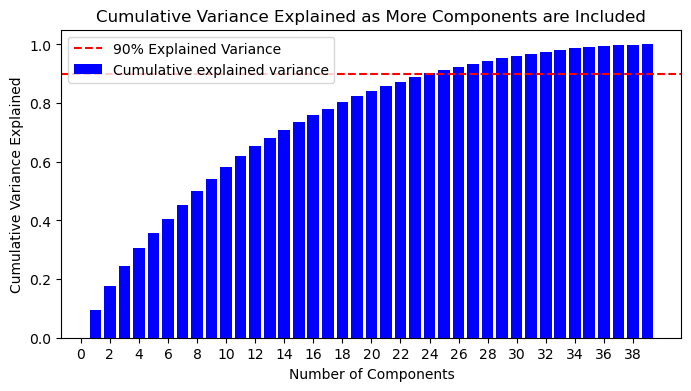

In [1338]:
pca = PCA()
pca.fit(X_normalized)

proportion_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(proportion_variance)

#cumulative explained variance plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='b', label='Cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.xticks(np.arange(0, len(cumulative_variance) + 1, 2))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained as More Components are Included')
plt.legend()
plt.show()

In [1339]:
pca = PCA(n_components=24) #24 features
X_pca = pca.fit_transform(X_normalized)

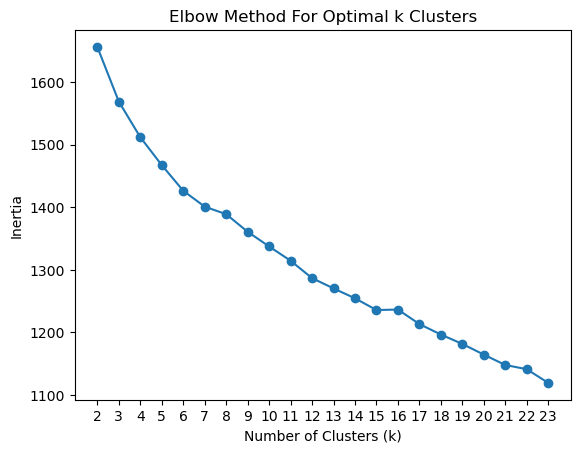

In [1340]:
#elbow method, choosing k- optimal # of clusters
inertia = []
for k in range (2,24): #expanded range based on presentation feedback
    #kmeans = KMeans(n_clusters = k)
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 500)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 24), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.xticks(np.arange(2, 24, 1))
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k Clusters')
plt.show()

#elbow = where inertia drops and starts to levels off

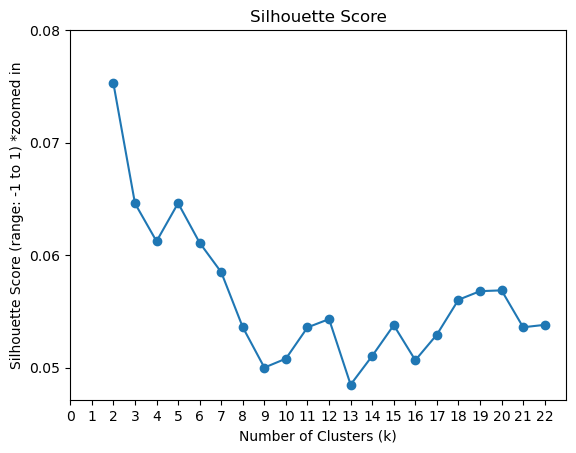

In [1341]:
#silhouette score
scores = []
for k in range(2,23):
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 500)
    kmeans.fit(X_pca)
    scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.plot(range(2, 23), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.xticks(np.arange(0, 23, 1))
plt.yticks(np.arange(0.05, 0.09, 0.01))
plt.ylabel('Silhouette Score (range: -1 to 1) *zoomed in')
plt.title('Silhouette Score')
plt.show()

k chosen is 2

In [1342]:
#fit model with chosen k value, predict + assign clusters
kmeans = KMeans(n_clusters=2, random_state=42,max_iter = 500) #tuned parameters included
clusters = kmeans.fit_predict(X_pca)

In [1343]:
#cluster labels added to dataframe
df['Cluster'] = clusters

In [1344]:
#avg value for each feature in each cluster, student profiles
pd.set_option('display.max_columns', None)
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.490099,16.589109,0.821782,0.717822,0.915842,3.123762,2.856436,1.341584,2.079208,0.287129,0.123762,0.732673,0.608911,0.603960,0.851485,0.960396,0.915842,0.341584,3.935644,3.212871,3.118812,1.529703,2.297030,3.594059,5.673267,11.000000,0.089109,0.128713,0.039604,0.460396,0.257426,0.074257,0.287129,0.465347,0.108911,0.267327,0.113861,0.277228,0.698020,0.059406
1,0.455959,16.808290,0.730570,0.704663,0.875648,2.357513,2.170984,1.559585,1.989637,0.383420,0.134715,0.487047,0.300518,0.409326,0.735751,0.937824,0.746114,0.326425,3.953368,3.259067,3.098446,1.430052,2.284974,3.512953,5.746114,9.803109,0.145078,0.041451,0.689119,0.051813,0.031088,0.015544,0.823834,0.088083,0.036269,0.284974,0.067358,0.253886,0.683938,0.103627


In [1345]:
#amount of students per cluster
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    202
1    193
Name: count, dtype: int64


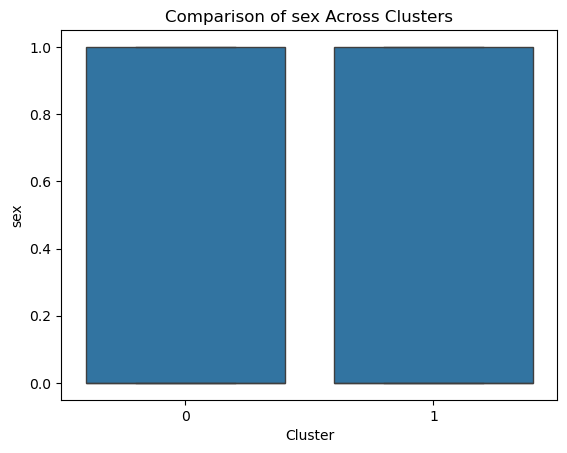

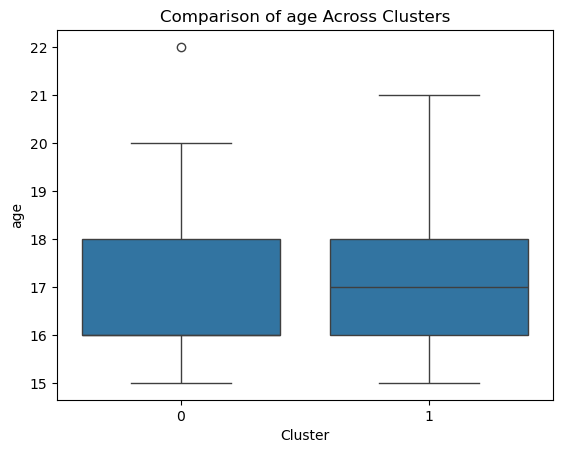

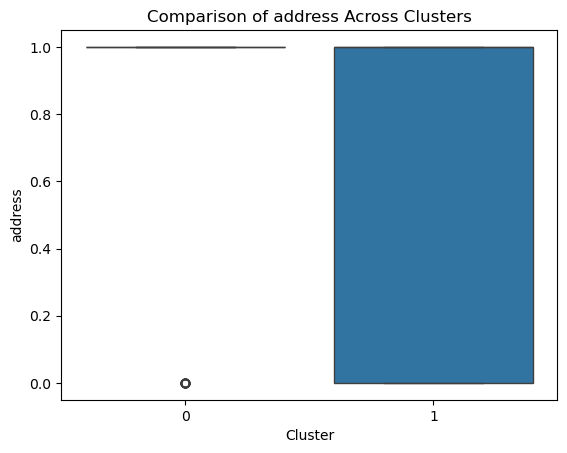

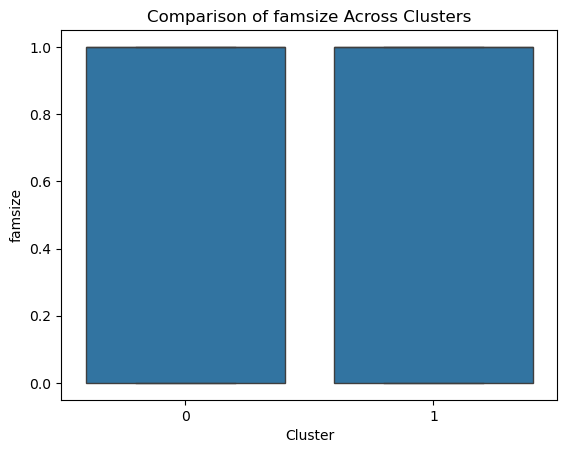

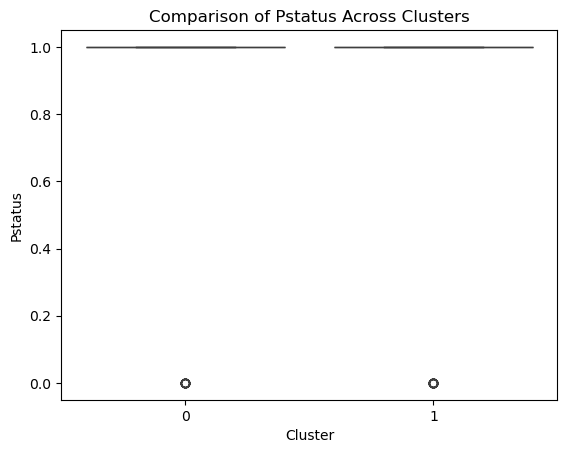

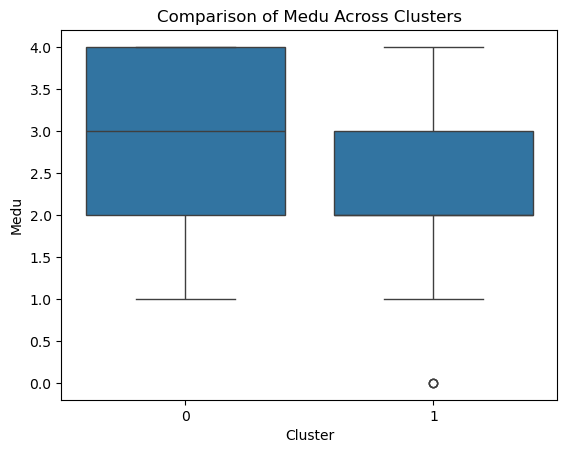

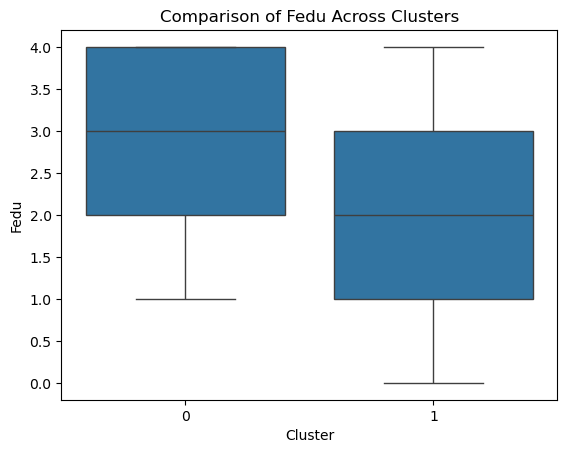

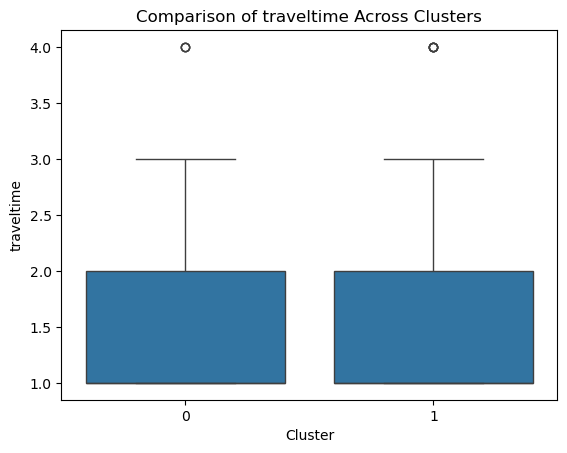

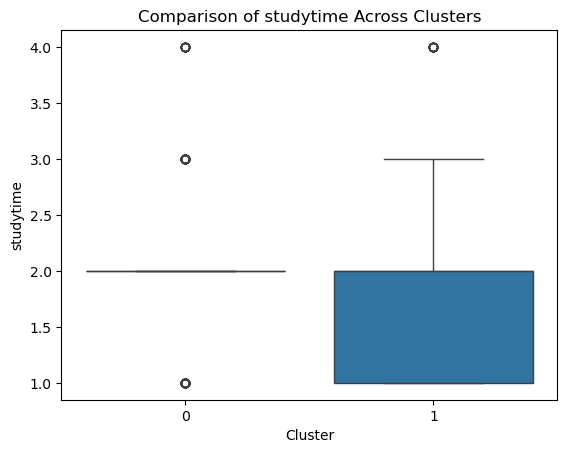

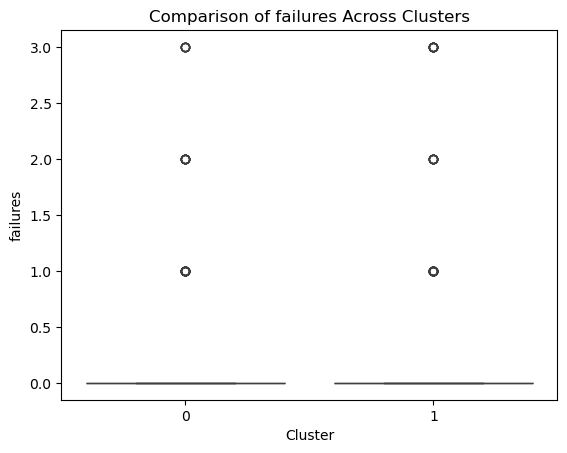

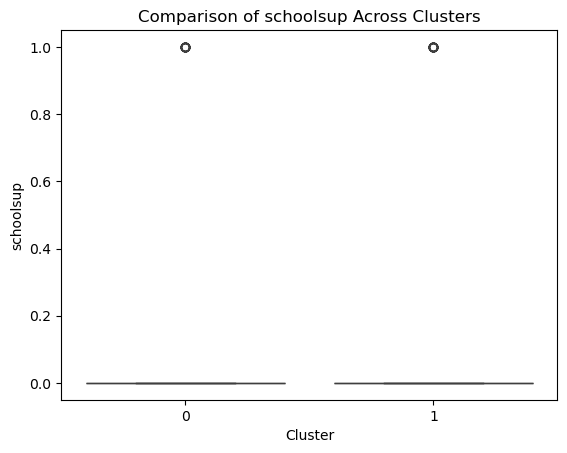

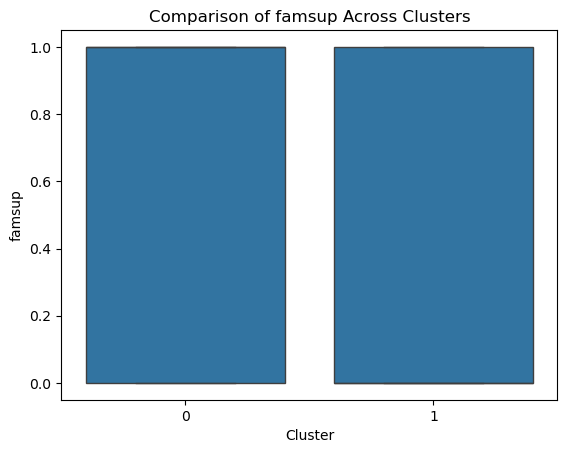

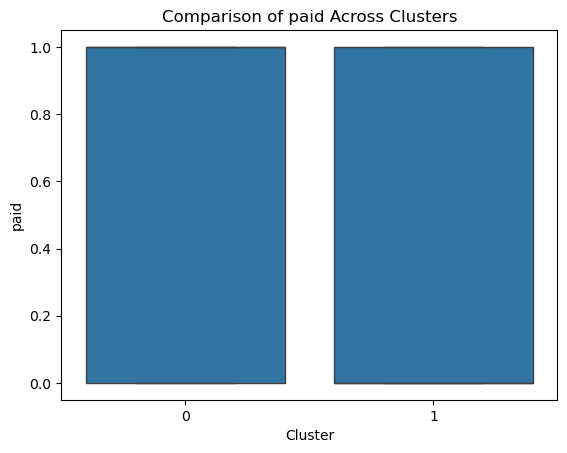

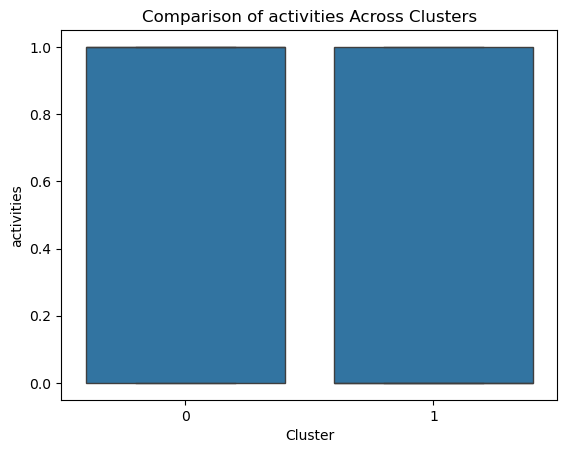

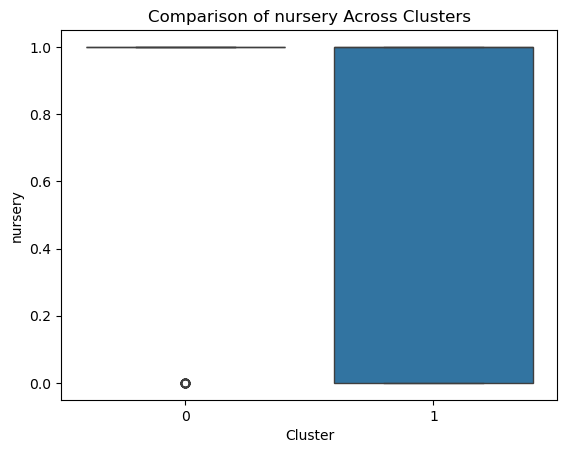

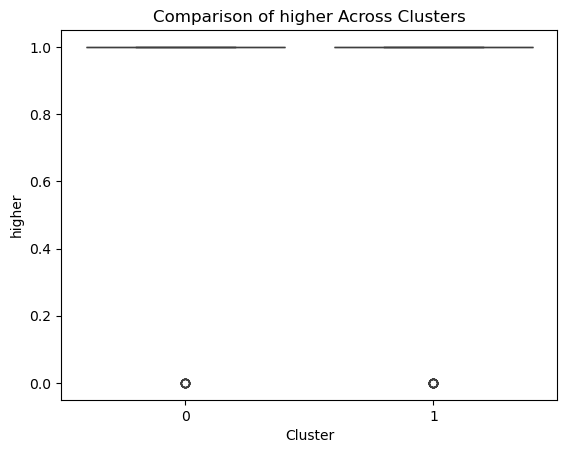

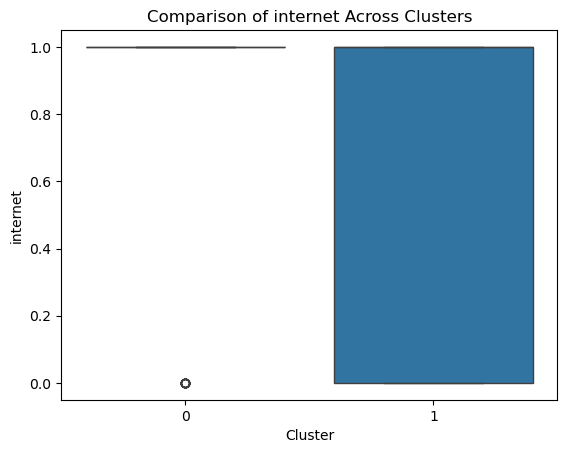

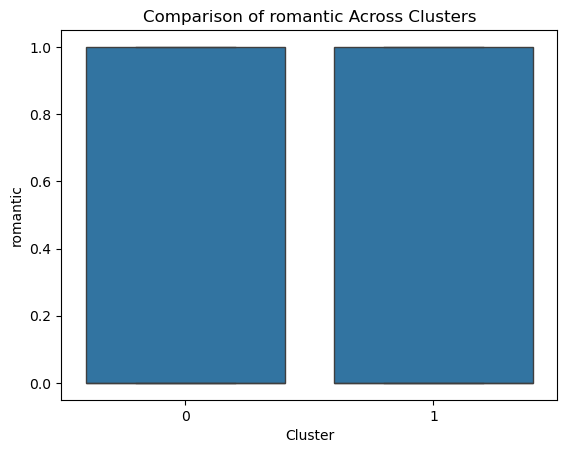

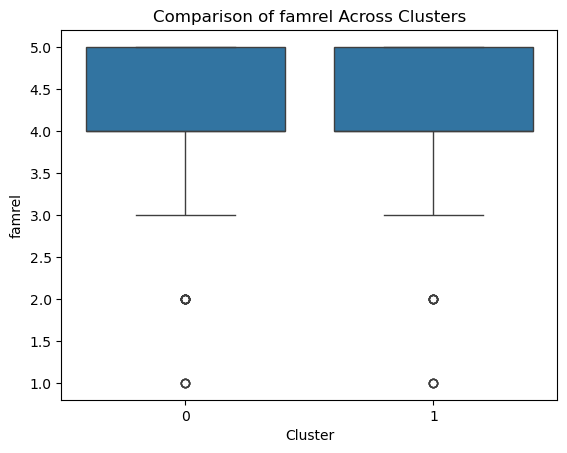

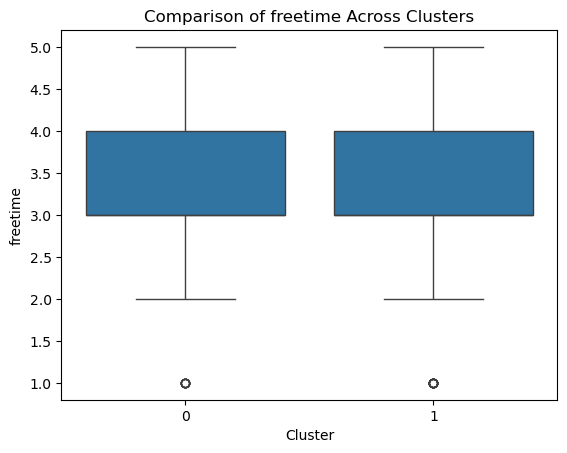

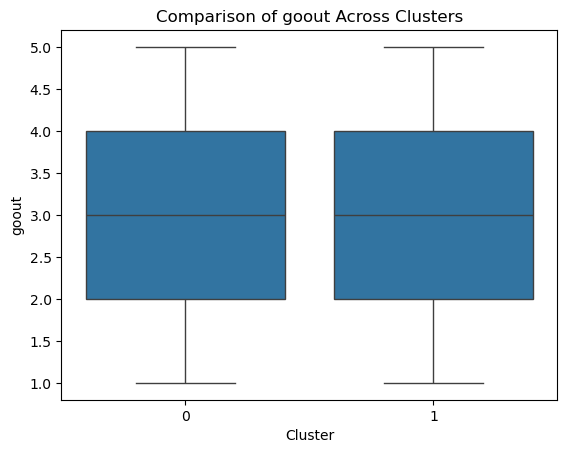

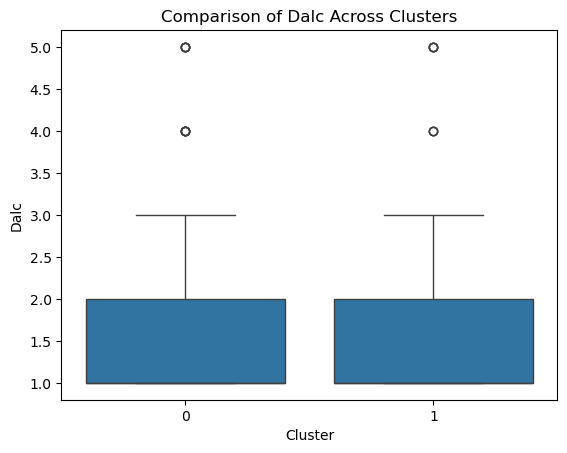

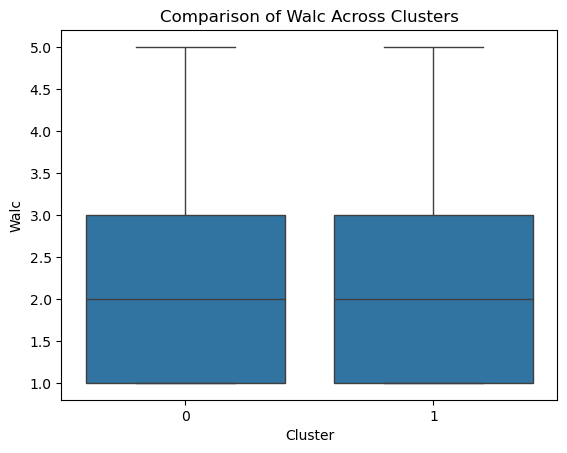

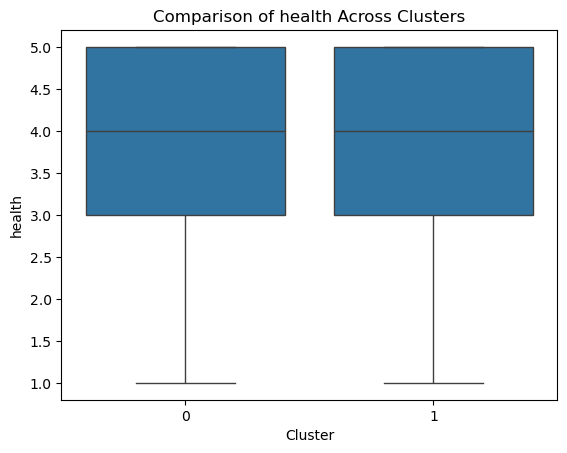

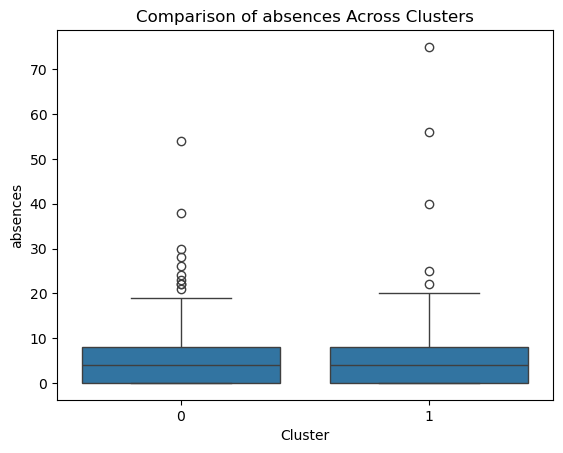

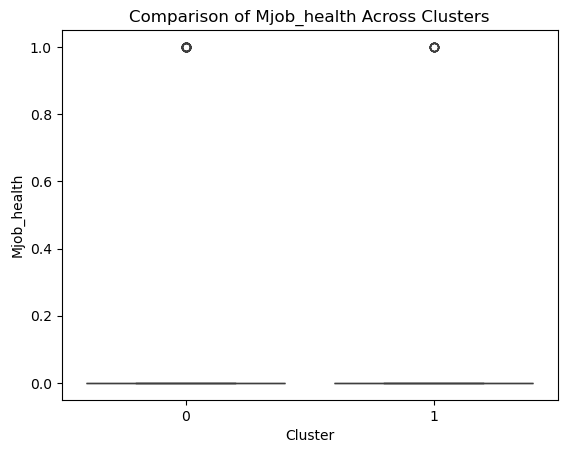

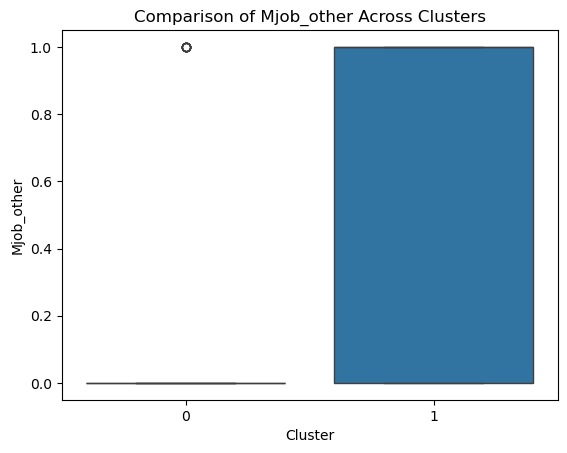

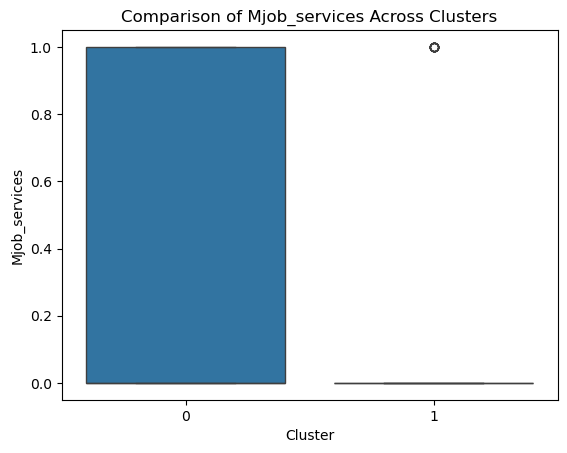

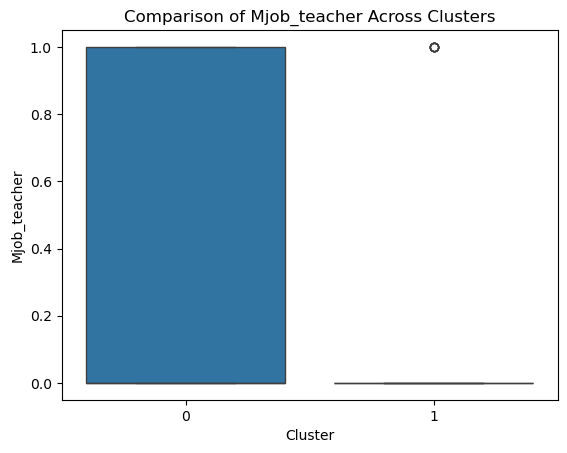

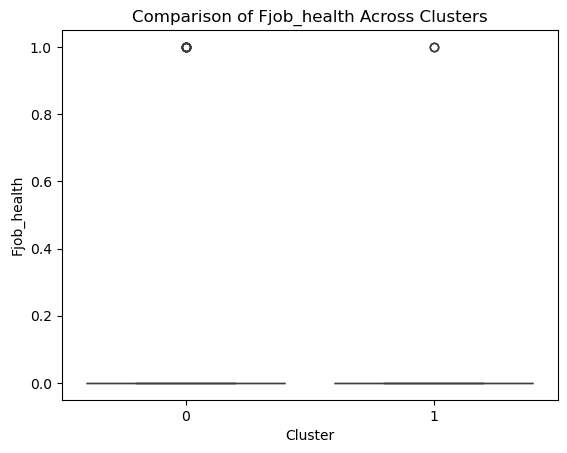

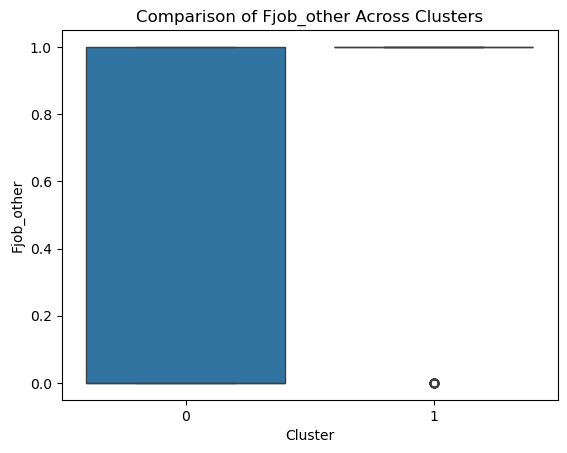

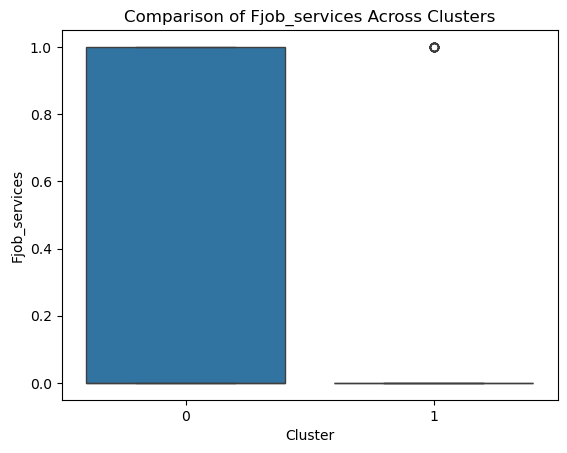

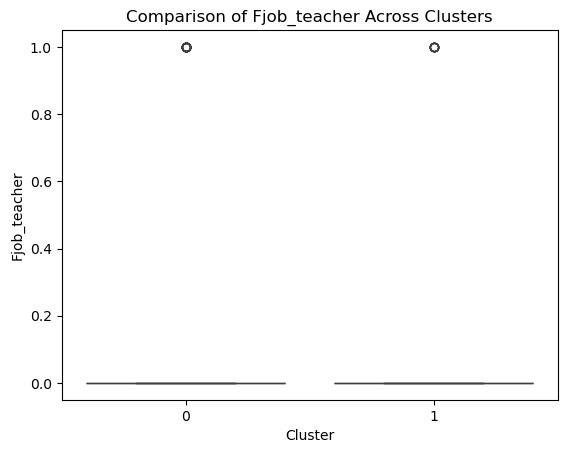

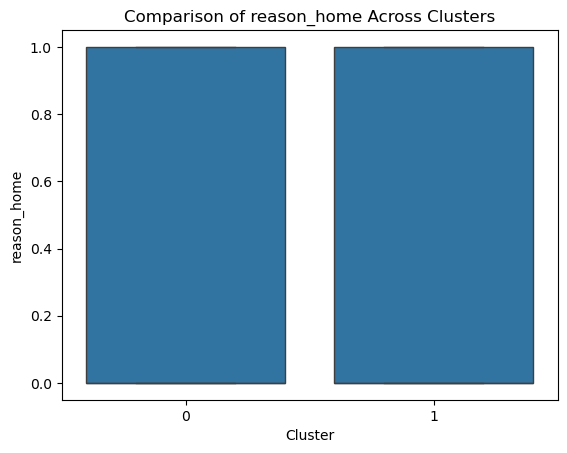

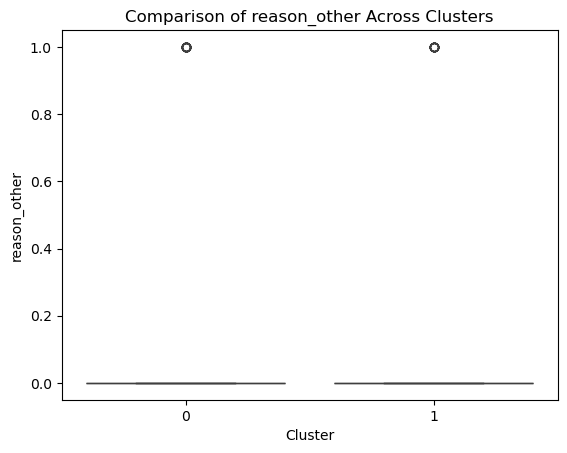

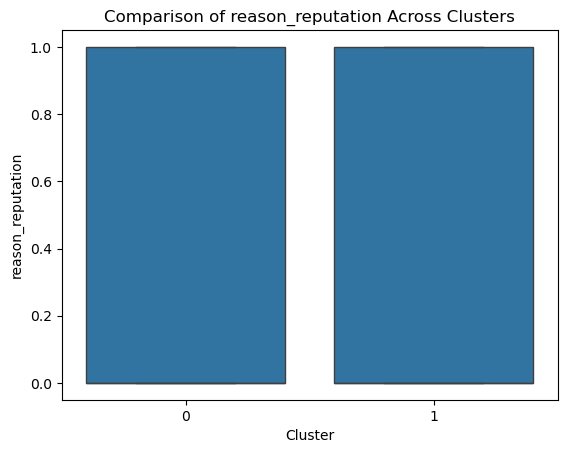

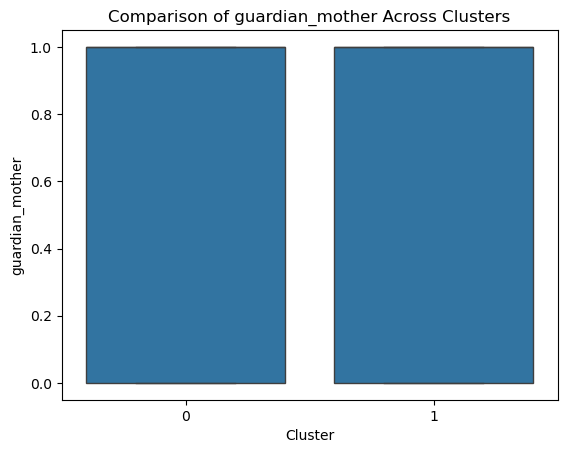

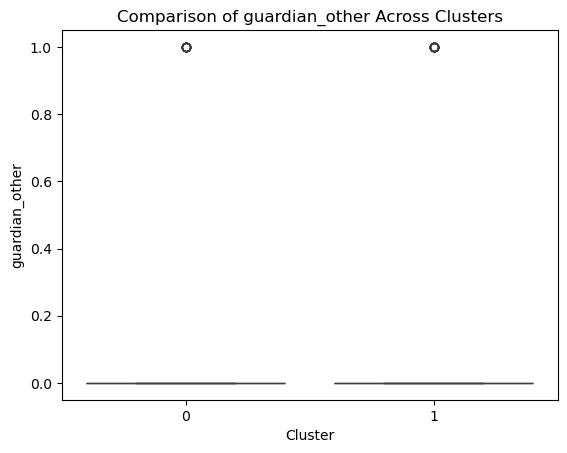

In [1346]:
#boxplots of each feature by clusters
features = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other'
]

for feature in features:
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} Across Clusters')
    plt.show()

In [1347]:
import warnings
warnings.filterwarnings("ignore")

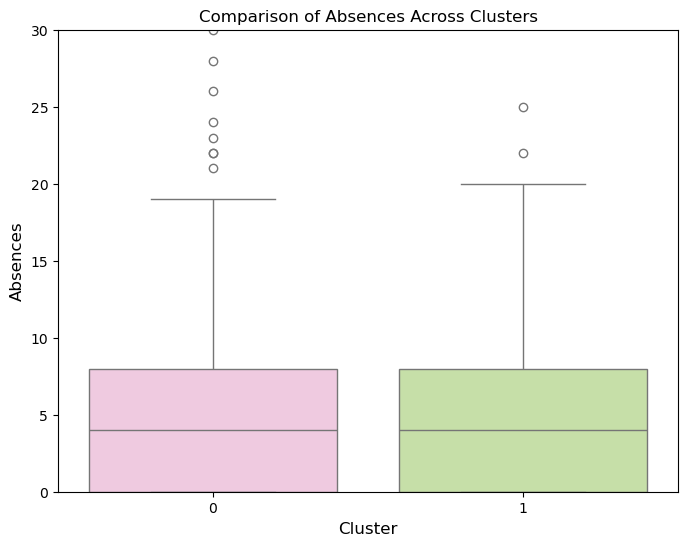

In [1348]:
#boxplot for absences feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='absences', data=df, palette='PiYG')
plt.ylim(0, 30)
plt.title('Comparison of Absences Across Clusters')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Absences', fontsize=12)
plt.show()

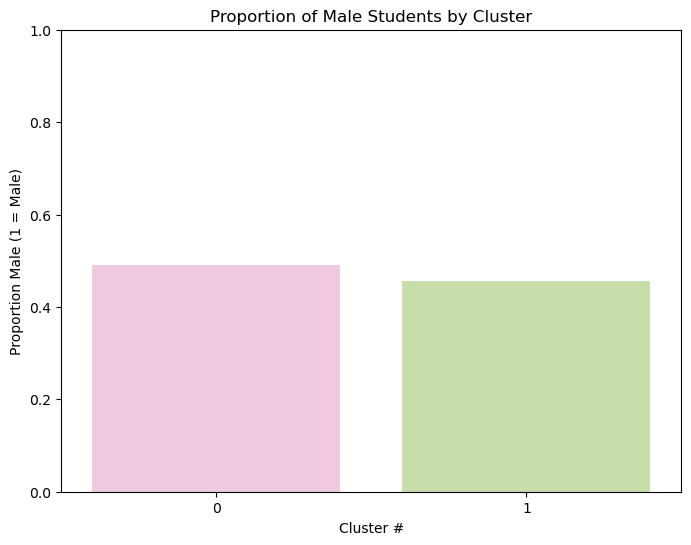

In [1349]:
#proportion of male students- sex feature representation
sex_means = df.groupby('Cluster')['sex'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='sex', data=sex_means, palette='PiYG')
plt.title('Proportion of Male Students by Cluster')
plt.xlabel('Cluster #')
plt.ylabel('Proportion Male (1 = Male)')
plt.ylim(0, 1)
plt.show()

In [1350]:
#using pca to visualize custers in 2D
pca2 = PCA(n_components=2)
pca_reduced = pca2.fit_transform(X_pca)

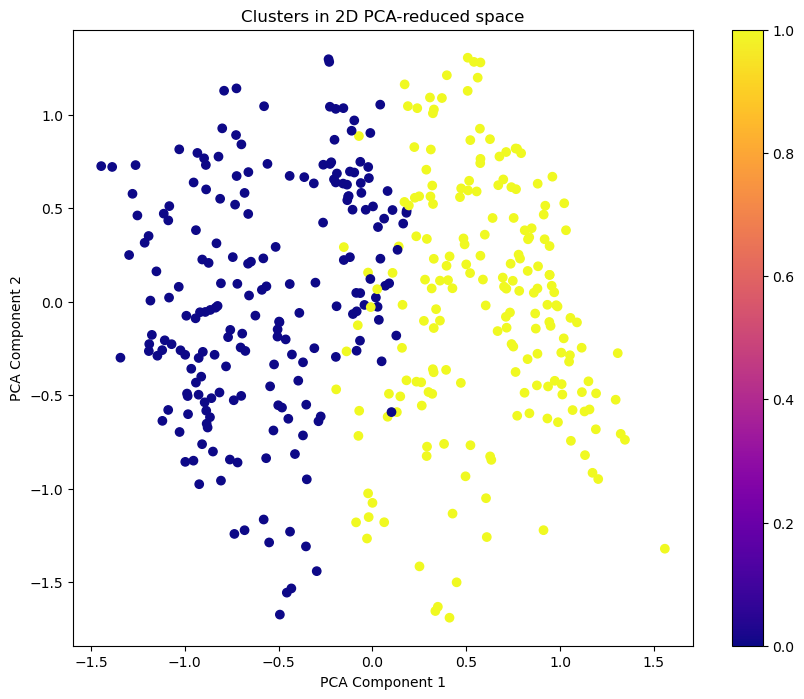

In [1351]:
#plotting 2D figure
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], c=kmeans.labels_, cmap='plasma') #x-axis component, y-axis component, label colors
plt.colorbar(scatter)
plt.title('Clusters in 2D PCA-reduced space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

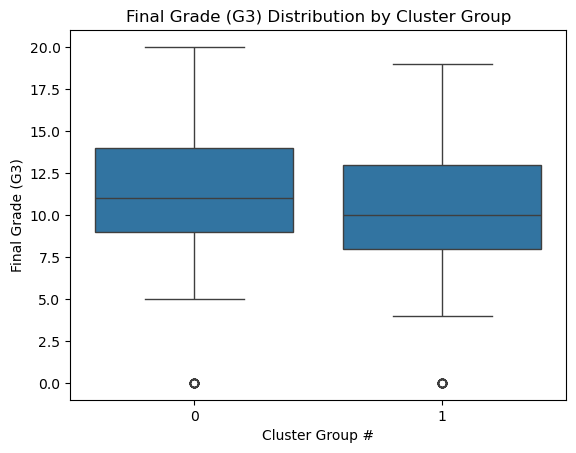

In [1352]:
#resulting groups vs grades
sns.boxplot(x='Cluster', y='G3', data=df)
plt.title("Final Grade (G3) Distribution by Cluster Group")
plt.xlabel('Cluster Group #')
plt.ylabel('Final Grade (G3)')
plt.show()

In [1353]:
#print out avg grade per cluster
print(df.groupby('Cluster')['G3'].mean())

Cluster
0    11.000000
1     9.803109
Name: G3, dtype: float64
